In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
max_features = 1000
max_len = 500


In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [7]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [8]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          128000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 163,937
Trainable params: 163,937
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 11s 68ms/step - loss: 0.9939 - acc: 0.5010 - val_loss: 0.6830 - val_acc: 0.5740
Epoch 2/10
157/157 [==============================] - 10s 61ms/step - loss: 0.6762 - acc: 0.5874 - val_loss: 0.6699 - val_acc: 0.5932
Epoch 3/10
157/157 [==============================] - 10s 61ms/step - loss: 0.6515 - acc: 0.6567 - val_loss: 0.6299 - val_acc: 0.6888
Epoch 4/10
157/157 [==============================] - 9s 59ms/step - loss: 0.6023 - acc: 0.7336 - val_loss: 0.5453 - val_acc: 0.7506
Epoch 5/10
157/157 [==============================] - 9s 60ms/step - loss: 0.5048 - acc: 0.7890 - val_loss: 0.4699 - val_acc: 0.8022
Epoch 6/10
157/157 [==============================] - 10s 62ms/step - loss: 0.4396 - acc: 0.8214 - val_loss: 0.4492 - val_acc: 0.8204
Epoch 7/10
157/157 [==============================] - 9s 60ms/step - loss: 0.4072 - acc: 0.8392 - val_loss: 0.4456 - val_acc: 0.8320
Epoch 8/10
157/157 [==============================] - 9s 60ms/ste

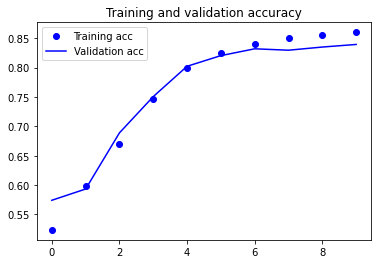

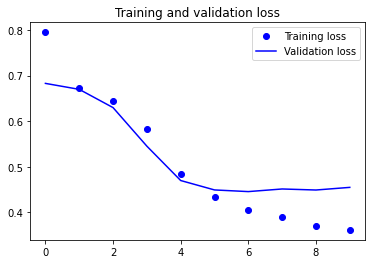

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()